In [1]:
import xarray
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
from netCDF4 import Dataset
import datetime
import numpy as np
import netCDF4 as netcdf
import pandas as pd
import octant.roms as roms
import cartopy
import cartopy.crs as ccrs  # commonly used shorthand
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

%matplotlib inline

# import pyroms



ModuleNotFoundError: No module named 'octant'

In [ ]:
fig = plt.figure(figsize=(10,6), dpi = 600) #tamaño de la figura
ax = fig.add_subplot(111, projection=p) #p es la proyeccion
make_map(fig, ax)
ax.pcolormesh(ncgrd['lon_rho'], ncgrd['lat_rho'], ncgrd['h'], transform=ccrs.PlateCarree())
cbar=plt.colorbar(ax.pcolormesh(ncgrd['lon_rho'], ncgrd['lat_rho'], ncgrd['h'], transform=ccrs.PlateCarree()))
# cbar.set_label('g/kg')
for i in range(0, ds['x_psi'].shape[1], 20):
    for j in range(0,ds['x_psi'].shape[0], 20):
        ax.plot(ncgrd['lon_psi'][::20,i], ncgrd['lat_psi'][::20,i], '-k', lw=0.1, transform=ccrs.PlateCarree())
        ax.plot(ncgrd['lon_psi'][j,::20], ncgrd['lat_psi'][j,::20], '-k', lw=0.1, transform=ccrs.PlateCarree())
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(18)

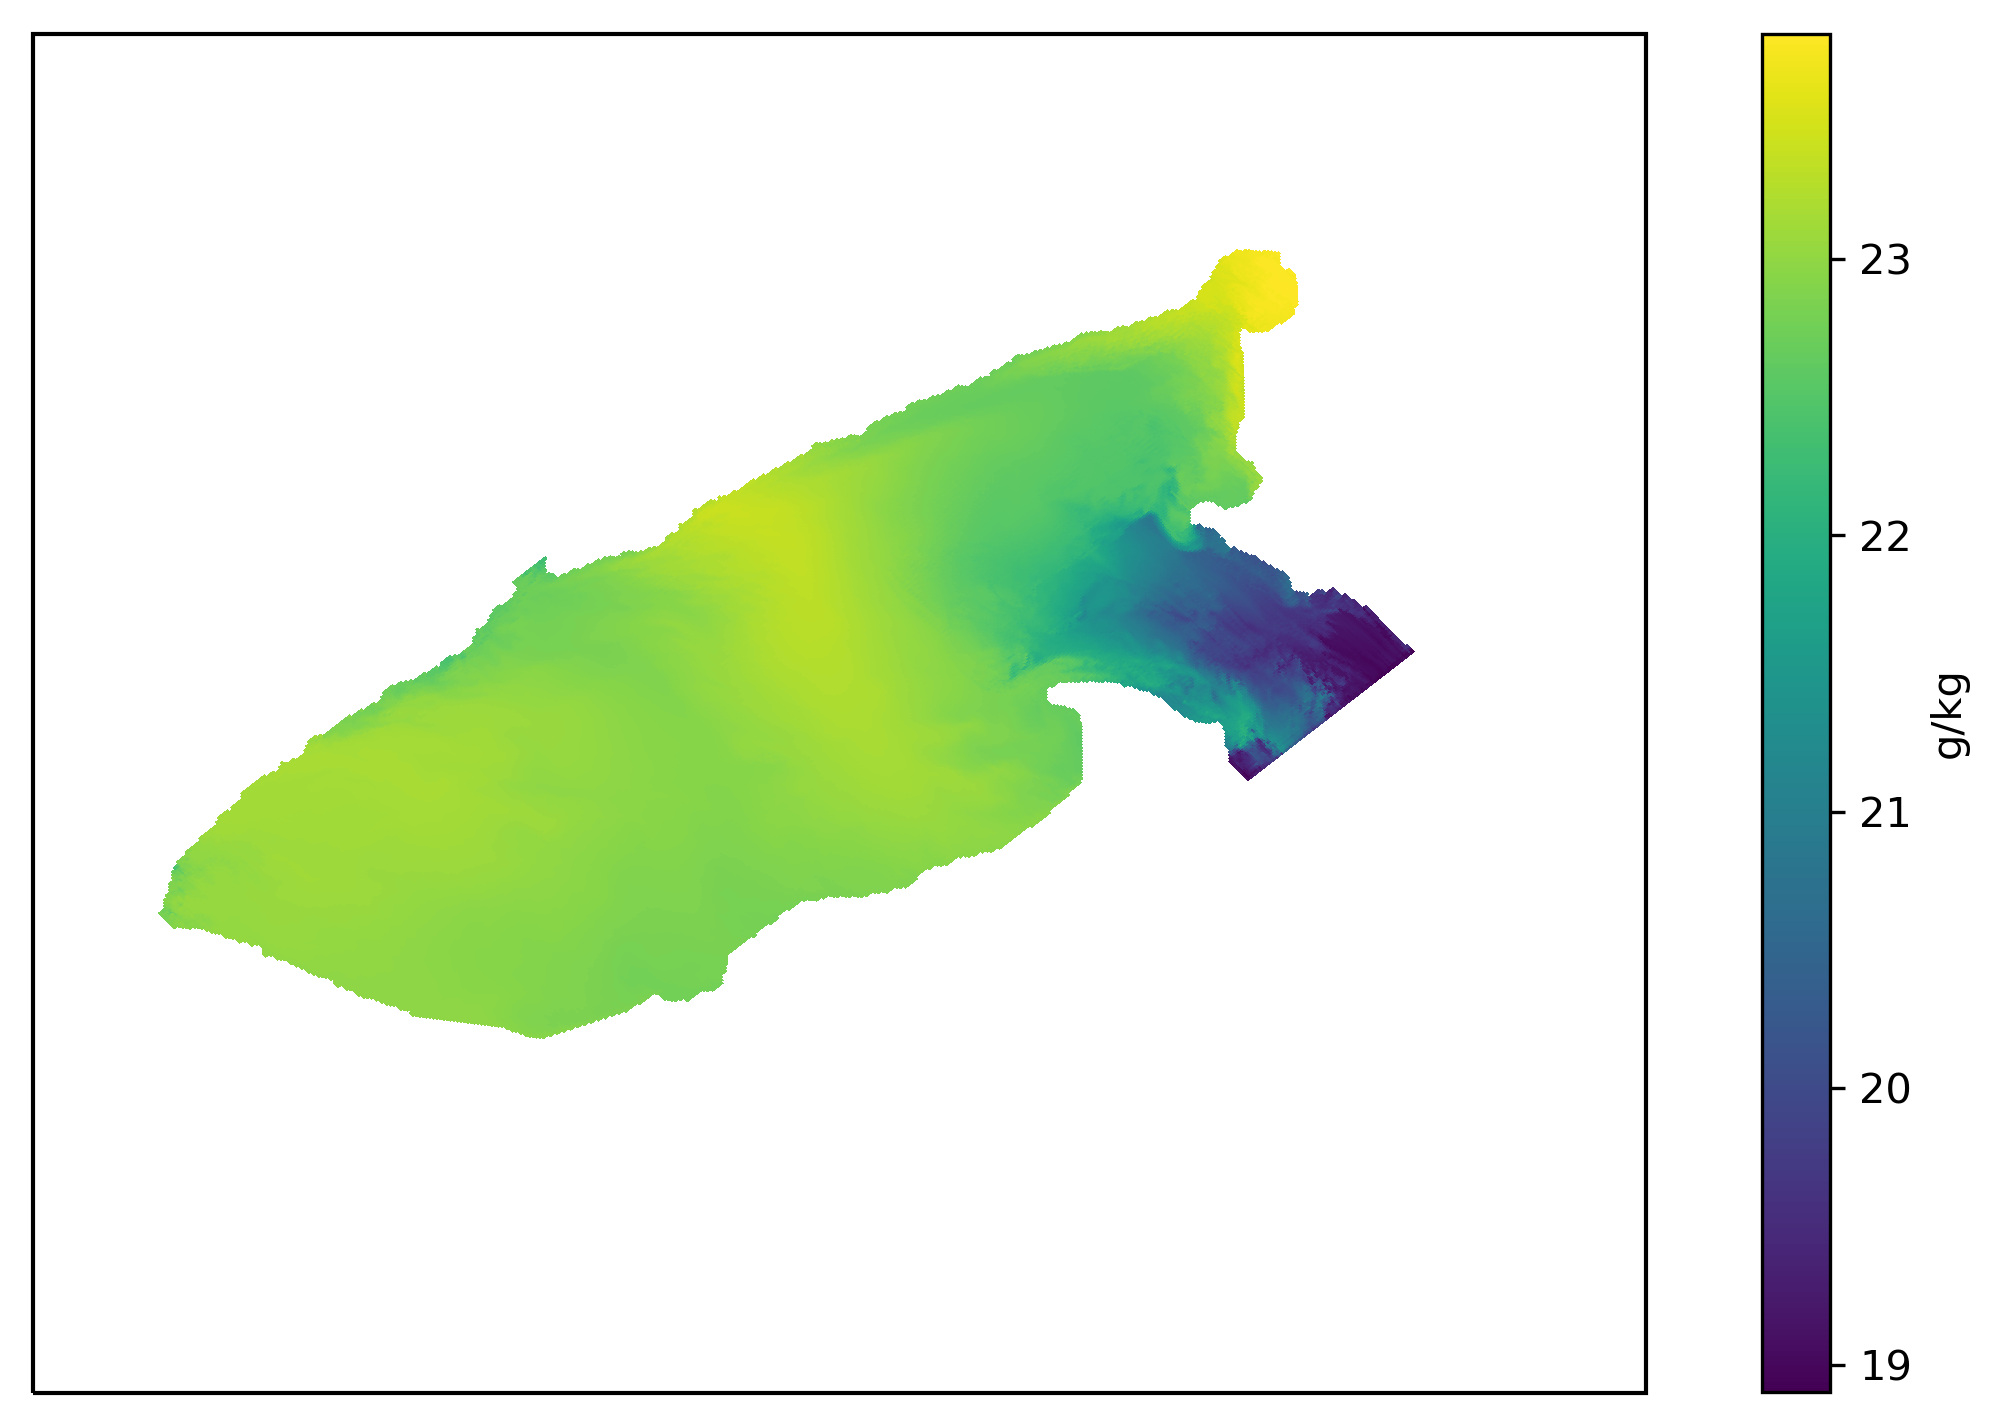

In [124]:
fig = plt.figure(figsize=(10,6), dpi = 300) #tamaño de la figura
ax = fig.add_subplot(111, projection=p) #p es la proyeccion
ax.pcolormesh(ncgrd['lon_rho'], ncgrd['lat_rho'], ds['salt'][4000,1,:,:])
cbar=plt.colorbar(ax.pcolormesh(ncgrd['lon_rho'], ncgrd['lat_rho'], ds['salt'][4000,1,:,:]))
cbar.set_label('g/kg')

In [4]:
ncfiles2010 = ['/d2/copano_bay/2015_n/jan_2015/output_jan_2015.nc',
           '/d2/copano_bay/2015_n/feb_2015/output_feb_2015.nc',
           '/d2/copano_bay/2015_n/march_2015/output_march_2015.nc',
           '/d2/copano_bay/2015_n/april_2015/output_april_2015.nc',
           '/d2/copano_bay/2015_n/may_2015/output_may_2015.nc',
           '/d2/copano_bay/2015_n/june_2015/output_june_2015.nc',
           '/d2/copano_bay/2015_n/july_2015/output_july_2015.nc',
           '/d2/copano_bay/2015_n/aug_2015/output_aug_2015.nc',
           '/d2/copano_bay/2015_n/sep_2015/output_sep_2015.nc',
           '/d2/copano_bay/2015_n/oct_2015/output_oct_2015.nc',
           '/d2/copano_bay/2015_n/nov_2015/output_nov_2015.nc',
           '/d2/copano_bay/2015_n/dec_2015/output_dec_2015.nc']
ds = xarray.open_mfdataset(ncfiles2010)
# nc = netcdf.MFDataset(['/d2/copano_bay/2010_n/jan_2010/output_jan_2010.nc',
#            '/d2/copano_bay/2010_n/feb_2010/output_feb_2010.nc',
#            '/d2/copano_bay/2010_n/march_2010/output_march_2010.nc',
#            '/d2/copano_bay/2010_n/april_2010/output_april_2010.nc',
#            '/d2/copano_bay/2010_n/may_2010/output_may_2010.nc',
#            '/d2/copano_bay/2010_n/june_2010/output_june_2010.nc',
#            '/d2/copano_bay/2010_n/july_2010/output_july_2010.nc',
#            '/d2/copano_bay/2010_n/aug_2010/output_aug_2010.nc',
#            '/d2/copano_bay/2010_n/sep_2010/output_sep_2010.nc',
#            '/d2/copano_bay/2010_n/oct_2010/output_oct_2010.nc',
#            '/d2/copano_bay/2010_n/nov_2010/output_nov_2010.nc',
#            '/d2/copano_bay/2010_n/dec_2010/output_dec_2010.nc',
#            '/d2/copano_bay/2011_n/jan_2011/output_jan_2011.nc',
#            '/d2/copano_bay/2011_n/feb_2011/output_feb_2011.nc'])

In [5]:
ncgrd = Dataset('/home/dylan/Grid_Files/copano_bay_grd_g300_new2.nc')
Cs_w = ncgrd['Cs_w'][:]
Cs_r = ncgrd['Cs_r'][:]
sw = ncgrd['s_w'][:]
sr = ncgrd['s_rho'][:]
h = ncgrd['h'][:,:]
hc = 0.5
N = 20

In [6]:
lat_top=28.218
lat_bot=28
lon_left=-97.22
lon_rigth=-97.00
res="10m"
[-97.22, -98.215, 28., 28.215]

lon_0 = (lon_left+lon_rigth)*0.5

extent=[lon_left, lon_rigth, lat_bot, lat_top]

p = ccrs.PlateCarree(central_longitude=lon_0) #Projection

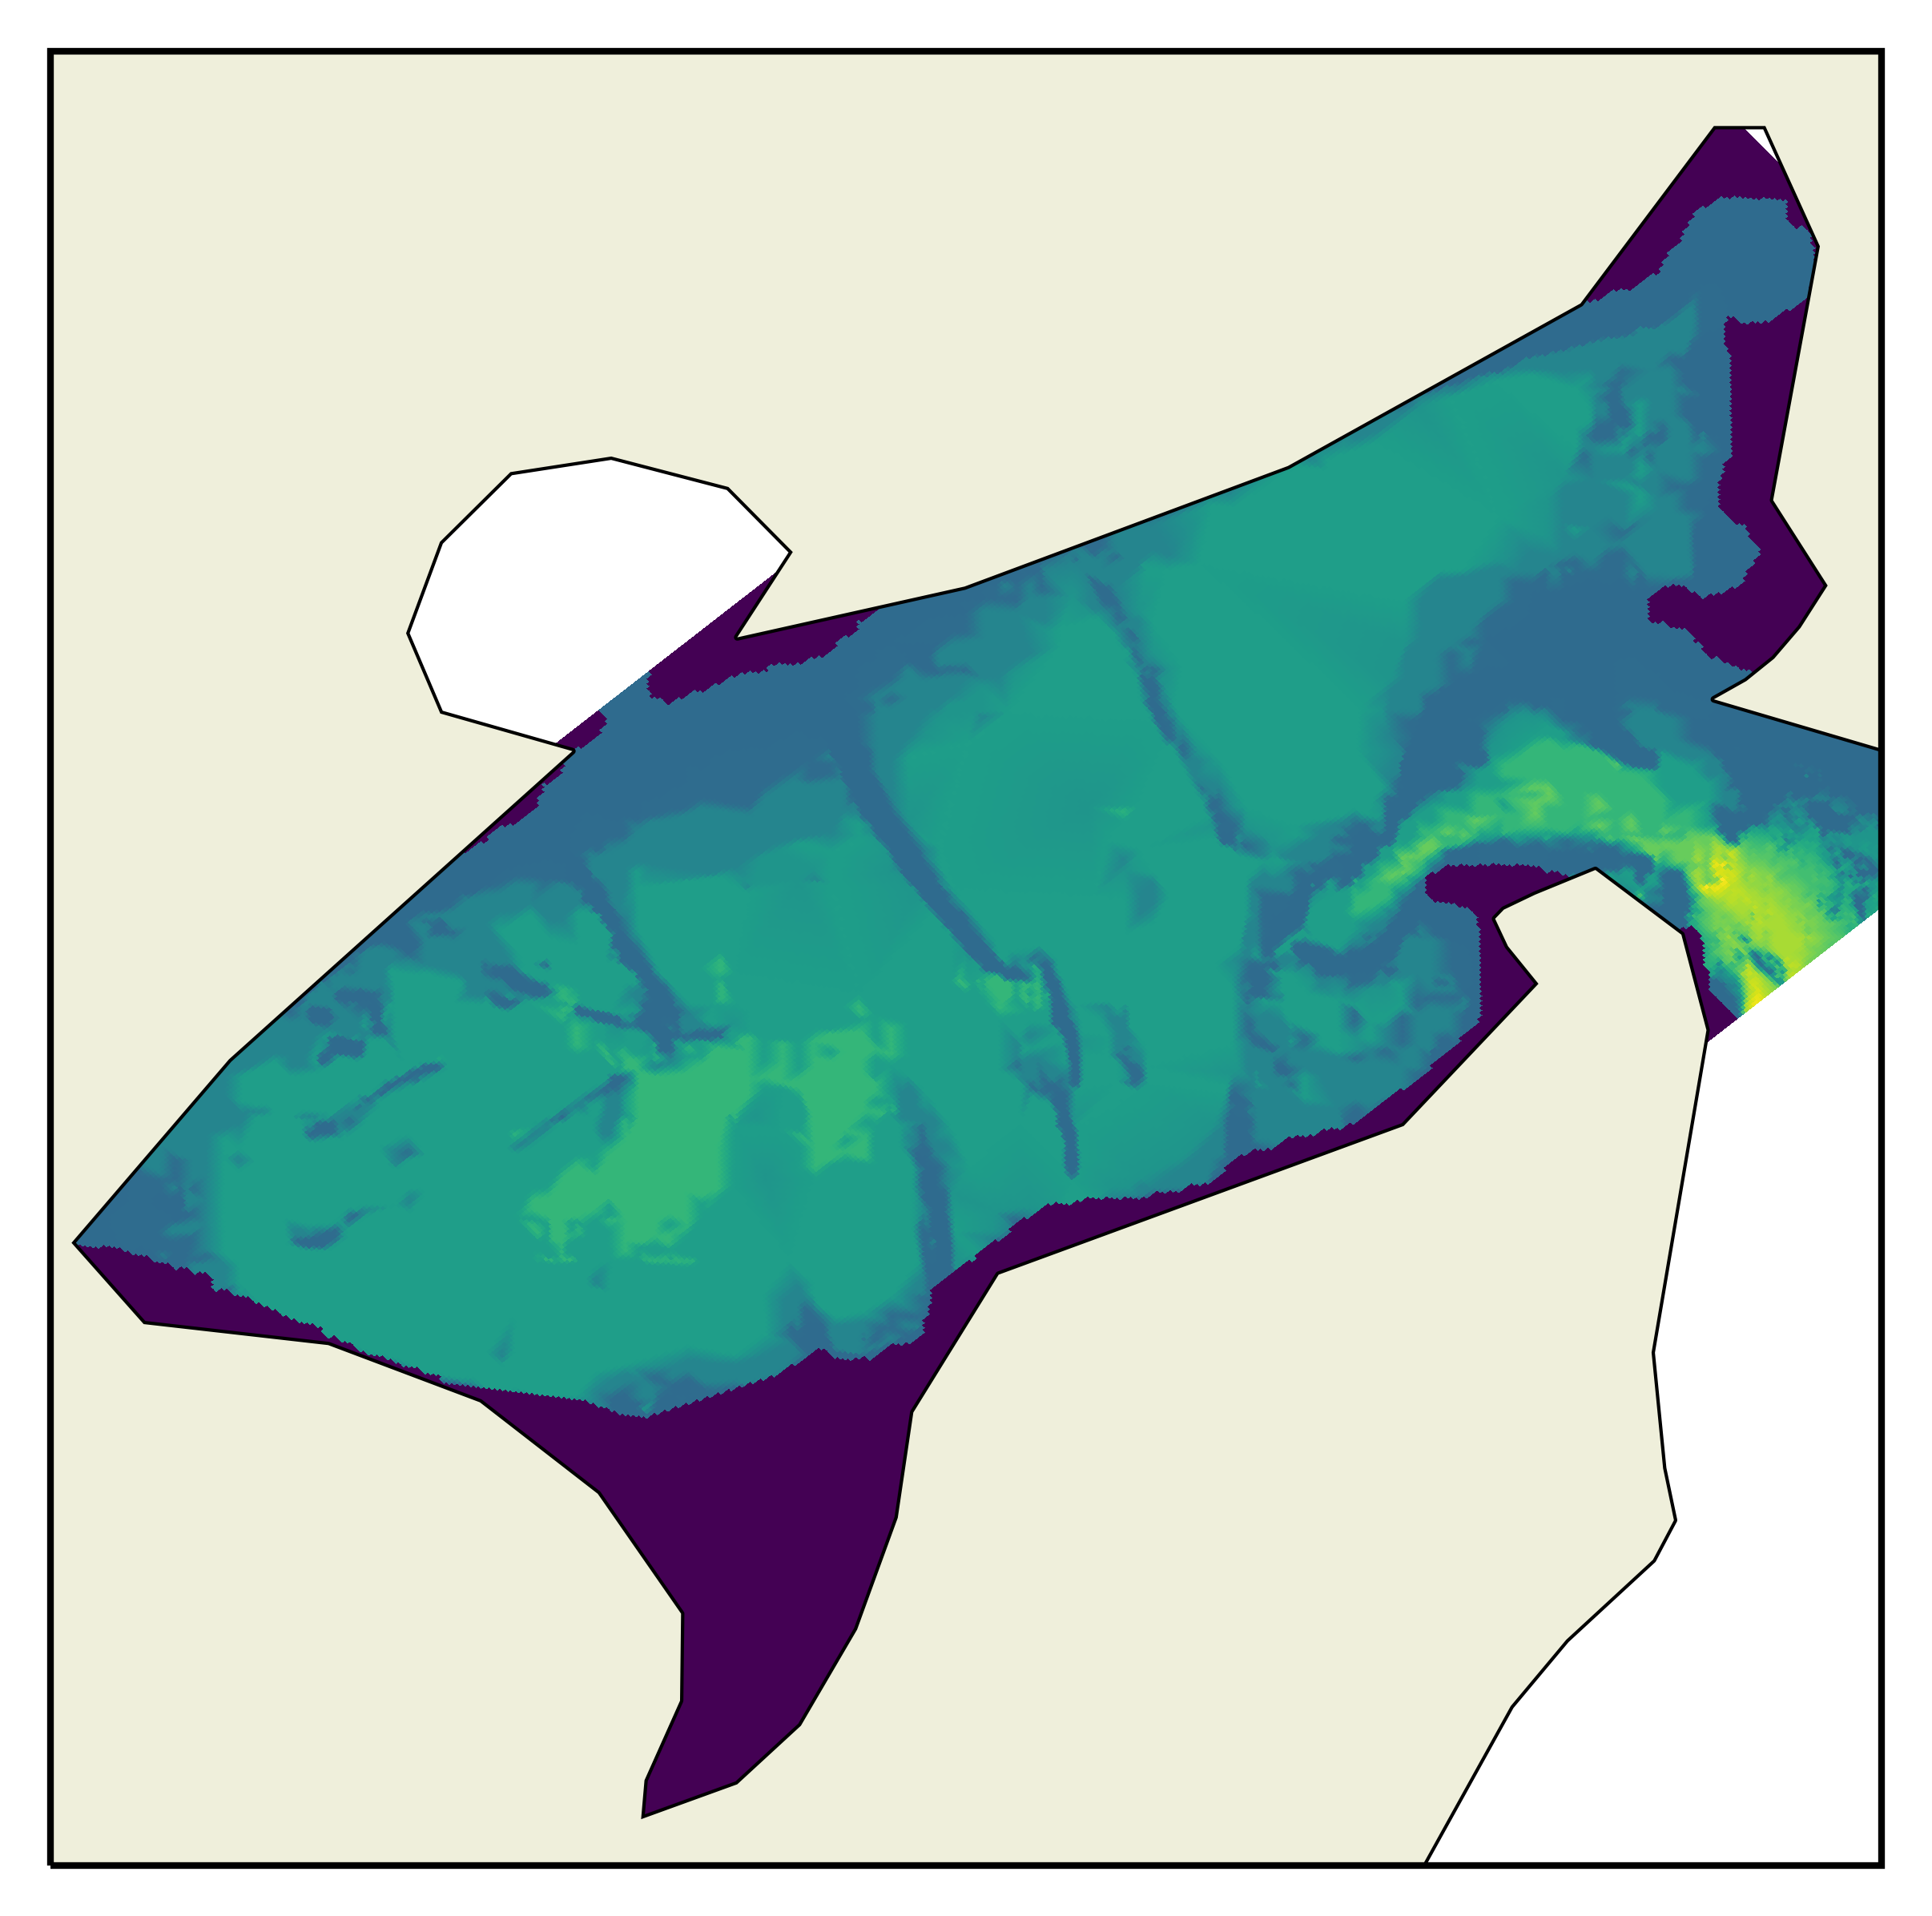

In [13]:
fig = plt.figure(figsize=(10,5),dpi = 600) #tamaño de la figura
ax = fig.add_subplot(111, projection=p) #p es la proyeccion
make_map(fig, ax)
ax.pcolormesh(ncgrd['lon_rho'], ncgrd['lat_rho'], ncgrd['h'], transform=ccrs.PlateCarree())
# for i in range(0, ds['x_psi'].shape[1], 20):
#     for j in range(0,ds['x_psi'].shape[0], 20):
#         ax.plot(grd['lon_psi'][::20,i], grd['lat_psi'][::20,i], '-k', lw=0.1, transform=ccrs.PlateCarree())
#         ax.plot(grd['lon_psi'][j,::20], grd['lat_psi'][j,::20], '-k', lw=0.1, transform=ccrs.PlateCarree())


In [2]:
def make_map(fig, ax):
    ax.set_extent(extent) #extent es la delimitacion del mapa
    ax.coastlines(res) # la resolucion de la costa (10 m)
    ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                name='land', facecolor=cfeature.COLORS['land'],
                                                scale=res)) #add land
    ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                name='rivers_lake_centerlines',
                                                edgecolor=cfeature.COLORS['water'], facecolor='none',
                                                scale=res)) #add rivers
    ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                name='lakes',
                                                scale=res,
                                               edgecolor='none', facecolor=cfeature.COLORS['water']))

    #la grilla:
#     gl = ax.gridlines(xlocs=[-97.3, -97.2], ylocs=np.arange(lat_bot, lat_top+1),
#                       draw_labels=True, linewidth=0.5, color='k', linestyle=':')
#     gl.xlabels_top = gl.ylabels_right = False
#     gl.xformatter = LONGITUDE_FORMATTER
#     gl.yformatter = LATITUDE_FORMATTER

In [20]:
lat_top=43.6
lat_bot=43.4
lon_left=-70.3750
lon_rigth=-70.3
res="10m"
[-70.29, -70.375, 43.4, 43.6]

lon_0 = (lon_left+lon_rigth)*0.5

extent=[lon_left, lon_rigth, lat_bot, lat_top]

p = ccrs.PlateCarree(central_longitude=lon_0) #Projection


In [ ]:
fig = plt.figure(figsize=(5,5),dpi = 600) #tamaño de la figura
ax = fig.add_subplot(111, projection=p) #p es la proyeccion
make_map(fig, ax)